# KNN ON WINES DATASET

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("wine.csv")
df

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
data = pd.concat([pd.DataFrame(df['Acl']) , pd.DataFrame(df['Color.int'])] , axis = 1)

In [4]:
data = np.array(data)

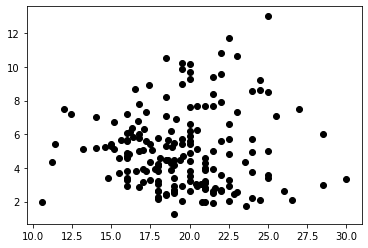

In [5]:
plt.scatter(data[:,0],data[:,1],c='black')
plt.show()

In [6]:
k = 3
max_iteration = 10

def Distance2Point(point1, point2):
    dis = sum((point1 - point2)**2)**0.5
    return dis

In [7]:
def KMean(data):

    centroids = {}


    for i in range(k):
        centroids[i] = data[i]

    classes = {}
    for iteration in range(max_iteration):
        classes = {}

    for classKey in range(k):
            classes[classKey] = []

    for dataPoint in data: 
        Distance = []
        for centroid in centroids:
            dis = Distance2Point(dataPoint, centroids[centroid])
            Distance.append(dis)

            minDis = min(Distance)
            minDisIndex = Distance.index(minDis)
            classes[minDisIndex].append(dataPoint)
           
        oldCentroid = dict(centroids)
        
    for classKey in classes:
        classData = classes[classKey]
        NewCentroid = np.mean(classData, axis = 0)
        centroids[classKey] = NewCentroid
        
    isFine = True

    for centroid in oldCentroid:
        oldCent = oldCentroid[centroid]
        curr = centroids[centroid]
            
        if np.sum((curr - oldCent)/oldCent * 100) > 0.001:
            isFine = False

        if isFine:
            break
    return centroids, classes


In [8]:
centroids, classes = KMean(data[:, :4])

In [9]:
print("First Cluter\n")
print(classes[0][1:10])
print("\n\nSecond Cluter\n")
print(classes[0][1:10])
print("\n\nThird Cluter\n")
print(classes[0][1:10])

First Cluter

[array([15.6 ,  5.64]), array([15.6 ,  5.64]), array([11.2 ,  4.38]), array([18.6 ,  5.68]), array([18.6 ,  5.68]), array([16.8,  7.8]), array([16.8,  7.8]), array([16.8,  7.8]), array([21.  ,  4.32])]


Second Cluter

[array([15.6 ,  5.64]), array([15.6 ,  5.64]), array([11.2 ,  4.38]), array([18.6 ,  5.68]), array([18.6 ,  5.68]), array([16.8,  7.8]), array([16.8,  7.8]), array([16.8,  7.8]), array([21.  ,  4.32])]


Third Cluter

[array([15.6 ,  5.64]), array([15.6 ,  5.64]), array([11.2 ,  4.38]), array([18.6 ,  5.68]), array([18.6 ,  5.68]), array([16.8,  7.8]), array([16.8,  7.8]), array([16.8,  7.8]), array([21.  ,  4.32])]


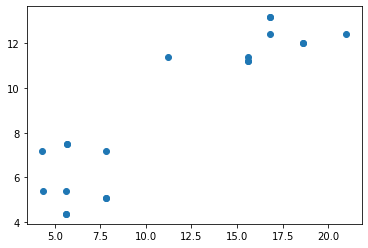

In [10]:
plt.scatter(classes[0][0:10] , classes[1][0:10])
plt.show()

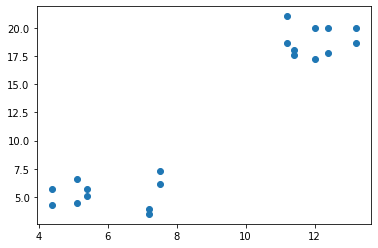

In [11]:
plt.scatter(classes[1][0:10] , classes[2][0:10])
plt.show()

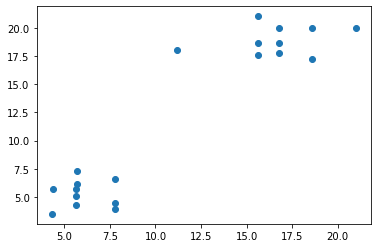

In [12]:
plt.scatter(classes[0][0:10] , classes[2][0:10])
plt.show()